# Breakout Room 3

Participants:
1. S M Ali Zaidi
2. Awais Qamar
3. Maheen Salman
4. Javeria Saleem
5. Zohaib Ahmed

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [65]:
df =pd.read_csv('/Users/Sohaib/Documents/ATOM CAMP/Deep learning/In Class Activity Breakout Rooms/students_adaptability_level_online_education.csv')

In [66]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


Content

A. The target feature:
Adaptivity level

B. The feature sets are:
1. Gender
2. Age
3. Education Level
4. Institution Type
5. IT Student
6. Location in Town
7. Load-shedding
8. Financial Condition
9. Internet Type
10. Network Type
11. Class Duration
12. Self LMS
13. Device

Acknowledgements

In [4]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

In [5]:
unique_values = {column: df[column].unique() for column in df.columns}
unique_values

{'Gender': array(['Boy', 'Girl'], dtype=object),
 'Age': array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object),
 'Education Level': array(['University', 'College', 'School'], dtype=object),
 'Institution Type': array(['Non Government', 'Government'], dtype=object),
 'IT Student': array(['No', 'Yes'], dtype=object),
 'Location': array(['Yes', 'No'], dtype=object),
 'Load-shedding': array(['Low', 'High'], dtype=object),
 'Financial Condition': array(['Mid', 'Poor', 'Rich'], dtype=object),
 'Internet Type': array(['Wifi', 'Mobile Data'], dtype=object),
 'Network Type': array(['4G', '3G', '2G'], dtype=object),
 'Class Duration': array(['3-6', '1-3', '0'], dtype=object),
 'Self Lms': array(['No', 'Yes'], dtype=object),
 'Device': array(['Tab', 'Mobile', 'Computer'], dtype=object),
 'Adaptivity Level': array(['Moderate', 'Low', 'High'], dtype=object)}

In [6]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [67]:
# Creating a copy of the dataframe for label encoding
df_en = df.copy()

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to each column
for column in df_en.columns:
    df_en[column] = label_encoder.fit_transform(df_en[column])

df_en.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [68]:
df_en.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.449793,2.122822,1.196680,0.682988,0.252282,0.775934,0.833195,0.341909,0.423237,1.627386,1.047303,0.174274,0.890456,1.435685
std,0.497679,1.210359,0.722437,0.465506,0.434503,0.417139,0.372956,0.605302,0.494277,0.515295,0.548559,0.379502,0.384003,0.642013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


# Initializing Machine Learning Models 

In [59]:
# Preparing the data
X = df_en.drop('Adaptivity Level', axis=1)
y = df_en['Adaptivity Level']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XG Booster Classifier": XGBClassifier()
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "Mean Squared Error": mse}

In [60]:
results

{'Logistic Regression': {'Accuracy': 0.6740331491712708,
  'Mean Squared Error': 0.5165745856353591},
 'Decision Tree': {'Accuracy': 0.8812154696132597,
  'Mean Squared Error': 0.21823204419889503},
 'Random Forest': {'Accuracy': 0.8950276243093923,
  'Mean Squared Error': 0.20441988950276244},
 'Gradient Boosting': {'Accuracy': 0.8038674033149171,
  'Mean Squared Error': 0.32044198895027626},
 'Support Vector Machine': {'Accuracy': 0.7624309392265194,
  'Mean Squared Error': 0.3867403314917127},
 'K-Nearest Neighbors': {'Accuracy': 0.7154696132596685,
  'Mean Squared Error': 0.47513812154696133},
 'XG Booster Classifier': {'Accuracy': 0.8922651933701657,
  'Mean Squared Error': 0.20718232044198895}}

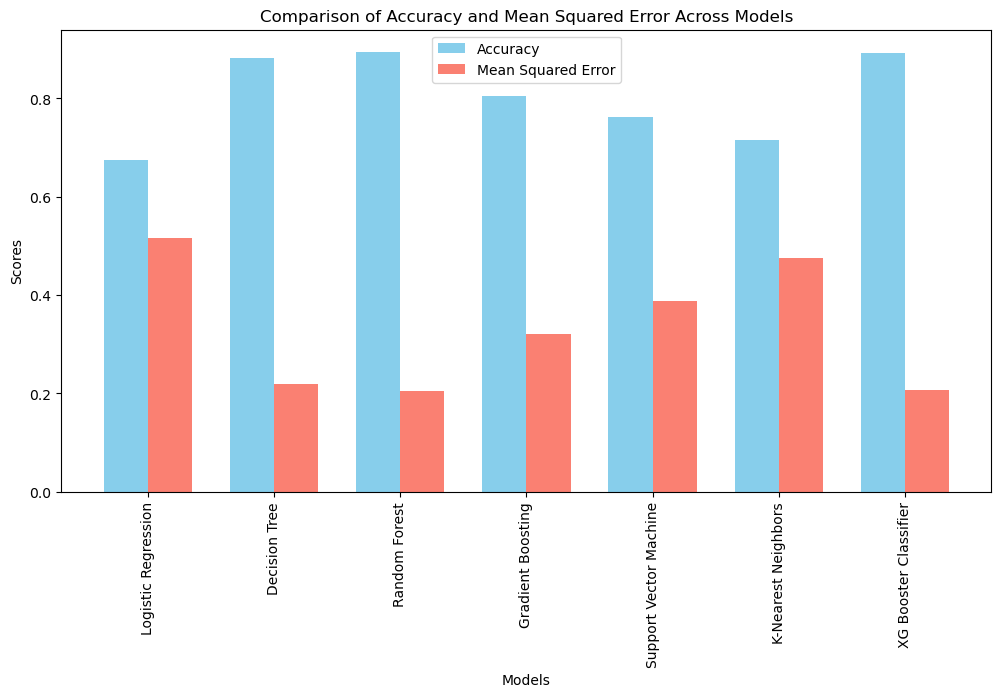

In [62]:
#'results' is our dictionary containing the model results
results_df = pd.DataFrame(results).transpose()

fig, ax = plt.subplots(figsize=(12, 6))  
# Setting the positions for the bars
ind = range(len(results_df))
width = 0.35

# Plotting Accuracy and Mean Squared Error side by side for each model
accuracy_bars = ax.bar(ind, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
error_bars = ax.bar([i + width for i in ind], results_df['Mean Squared Error'], width, label='Mean Squared Error', color='salmon')

# Adding labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy and Mean Squared Error Across Models')

# Set the x-ticks and rotate them for better visibility
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(results_df.index, rotation=90)  # Rotate the labels vertically

ax.legend()

plt.show()


# Hyperparameter Tuning

# Grid Search

In [26]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
# Implementing the Random Forest model with the best parameters obtained from Grid Search
rf_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

# Training the optimized model
rf_optimized.fit(X_train, y_train)

# Evaluating the optimized model on the test set
optimized_pred = rf_optimized.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_pred)
optimized_mse = mean_squared_error(y_test, optimized_pred)

optimized_accuracy, optimized_mse


(0.8867403314917127, 0.212707182320442)

In [78]:
# checking if with a somechanges in the grid whether the results get better or not
rf_optimized2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

# Training the optimized model
rf_optimized2.fit(X_train, y_train)

# Evaluating the optimized model on the test set
optimized_pred = rf_optimized2.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_pred)
optimized_mse = mean_squared_error(y_test, optimized_pred)

optimized_accuracy, optimized_mse


(0.8977900552486188, 0.20165745856353592)

In [79]:
rf_optimized3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

# Training the optimized model
rf_optimized3.fit(X_train, y_train)

# Evaluating the optimized model on the test set
optimized_pred = rf_optimized3.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_pred)
optimized_mse = mean_squared_error(y_test, optimized_pred)

optimized_accuracy, optimized_mse

(0.8895027624309392, 0.20994475138121546)

Now trying other method because the accuracies and errors are achieving the similar points as achieved in the 
Random Forest results

# Random Search Setup

In [81]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': range(100, 500),
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_rs = RandomForestClassifier()

# Initialize the Random Search model
random_search = RandomizedSearchCV(estimator=rf_rs, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 243, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


In [77]:
# testing the best parameter found in the Random Search 
rf_rs_optimized = RandomForestClassifier(
    n_estimators=243,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

# Training the optimized model
rf_rs_optimized.fit(X_train, y_train)

# Evaluating the optimized model on the test set
optimized_pred = rf_rs_optimized.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_pred)
optimized_mse = mean_squared_error(y_test, optimized_pred)

optimized_accuracy, optimized_mse


(0.8950276243093923, 0.20441988950276244)

The hyper parameter tuning showed the results with parameters of Random Search Results.

Applying cross validation to check the performance of the model with the parameters found by applying Random Search

# Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models by dividing data into subsets, training the model on some subsets and validating it on the remaining subsets.

In [83]:
from sklearn.model_selection import cross_val_score

# Initialize the optimized Random Forest model with the best parameters
rf_rs_cv = RandomForestClassifier(
    n_estimators=243,
    max_depth=40,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

# Perform cross-validation
cv_scores = cross_val_score(rf_rs_cv, X, y, cv=5)  # We can specify the number of folds (e.g., cv=5)

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.94605809 0.90871369 0.89211618 0.90041494 0.87966805]
Mean Cross-Validation Score: 0.9053941908713693
Standard Deviation of Cross-Validation Scores: 0.022483348023475614


The cross-validation scores vary from 0.88 to 0.95, indicating some fluctuation in the model's performance across different data subsets. The average score of approximately 0.905 suggests a generally strong performance of the model. The standard deviation of about 0.02 points to a small variability in performance. Overall, these results imply that the model is reliable and consistent, but with some variation in its effectiveness across different subsets of the data.

Now applying the cross validation on the Random Forest with out the grid of specific parameters 

In [69]:
# X and y are our features and target variable
rf_optimized = RandomForestClassifier()  # We can replace this with our optimized model

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf_optimized, X, y, cv=5)

# Displaying the results in the specified format
print("The results of cross-validation for the optimized Random Forest model are as follows:\n")
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


The results of cross-validation for the optimized Random Forest model are as follows:

Cross-Validation Scores: [0.94605809 0.90041494 0.90041494 0.90041494 0.87966805]
Mean Cross-Validation Score: 0.9053941908713693
Standard Deviation of Cross-Validation Scores: 0.02186214086692031


The above results also shows the same accuracy as achieved with specific parameters applying cross validation. Therefore it seems the model will predict the desired results but with a variation of approx 2%.  

# Feature importance Plots

Now checking which features performed well in predicting the adaptivity level. It is based on the random forest model applied on the optimized model without specific parameter.  

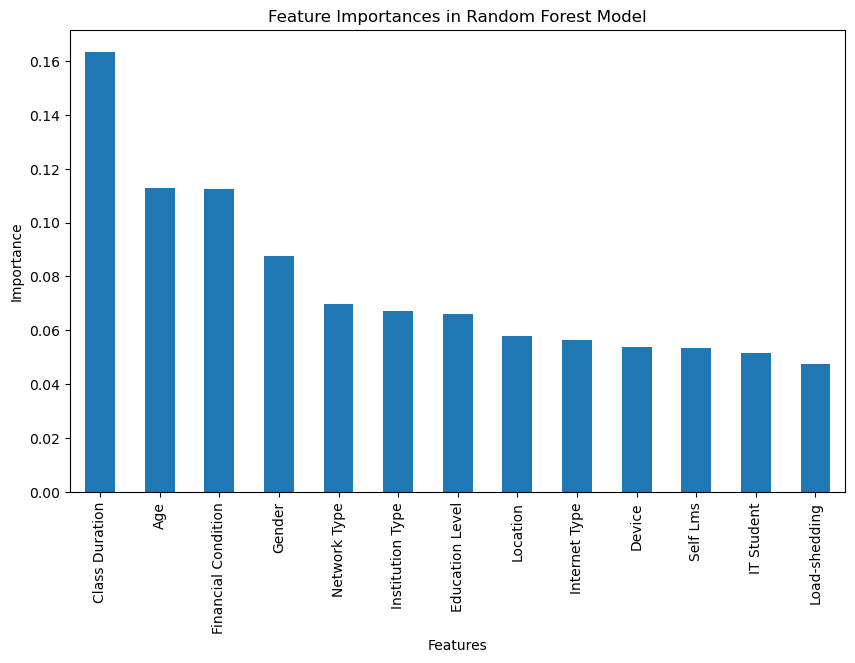

In [71]:
# X and y are our features and target variable
rf_optimized = RandomForestClassifier()  

# Fit the model to our data
rf_optimized.fit(X, y)

# Get feature importances
feature_importances = rf_optimized.feature_importances_

# Create a pandas series with feature importances and sort them
importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()

Applied on the cross validated model with optimized features

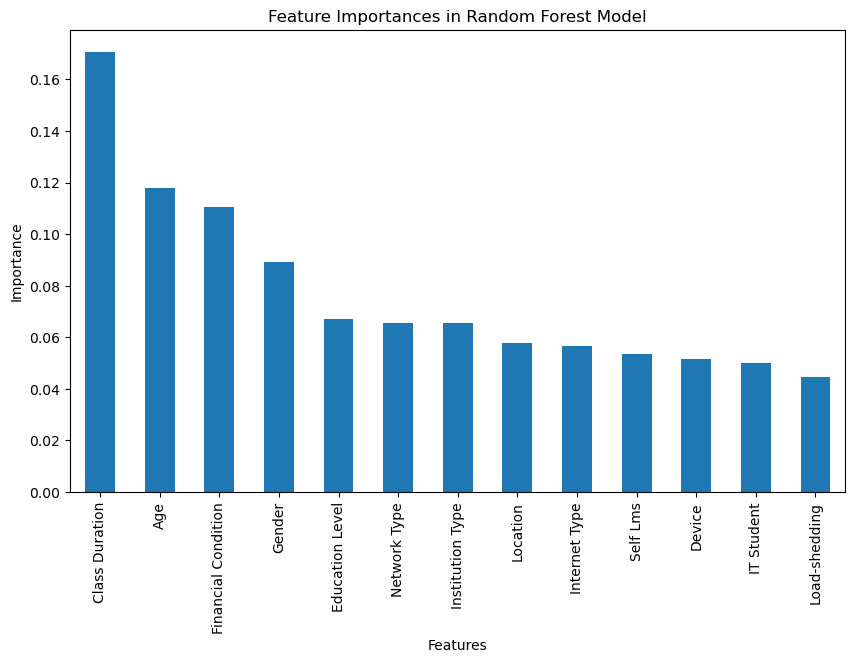

In [84]:
# X and y are our features and target variable
rf_rs_cv = RandomForestClassifier()  # Replace with our optimized model

# Fit the model to our data
rf_rs_cv.fit(X, y)

# Get feature importances
feature_importances = rf_rs_cv.feature_importances_

# Create a pandas series with feature importances and sort them
importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')

plt.show()

Confusion Matrix:
[[ 76   5  19]
 [  4 439  37]
 [  6  42 577]]


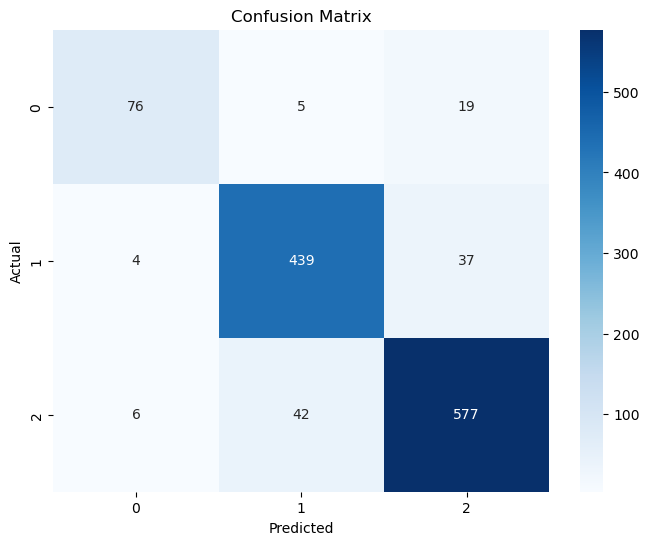

In [89]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# X and y are our features and target variable
rf_optimized = RandomForestClassifier()  # Replace with our optimized model

# Get cross-validated predictions
predictions = cross_val_predict(rf_optimized, X, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The confusion matrix represents the performance of the model in a multi-class classification problem. Matrix Structure: The confusion matrix is a square matrix with dimensions equal to the number of classes. In our case, there are three classes, forming a 3x3 matrix. Each row of the matrix represents the instances of an actual class, and each column represents the instances of a predicted class.

Diagonal Values (True Positives): The diagonal values represent the number of points for which the predicted label is equal to the true label. While we are predicting the Adaptivity Level. The encoding was done in the following manners; 3rd Moderate Adaptivity Level = 2 2nd Low Adaptivity Level = 1 1st High Adaptivity Level = 0

1. 76 instances of the High Adaptivity Level were correctly predicted as High Adaptivity Level.
2. 439 instances of the Low Adaptivity Level were correctly predicted as Low Adaptivity Level.
3. 577 instances of the Moderate Adaptivity Level were correctly predicted as Moderate Adaptivity Level.

Off-Diagonal Values (False Positives and False Negatives):

1. For the High Adaptivity Level, 5 instances were wrongly predicted as Low Adaptivity Level and 19 as the Moderate Adaptivity Level.
2. For the Low Adaptivity Level, 4 instances were wrongly predicted as the High Adaptivity Level and 37 as the Moderate Adaptivity Level.
3. For the Moderate Adaptivity Level, 6 instances were wrongly predicted as the High Adaptivity Level and 42 as the Low Adaptivity Level. Analysis:

The model is most accurate in predicting the Moderate Adaptivity Level, with 577 true positives and relatively fewer false positives and false negatives. The model performs well in predicting the Low Adaptivity Level too, with 439 true positives. However, it has a higher number of false negatives (37) compared to the High Adaptivity Level. The High Adaptivity Level has the least number of true positives (76), indicating that the model might be less effective in correctly identifying instances of High Adaptivity Level compared to the others. Overall our model shows strong predictive ability, especially for the Low Adaptivity Level and Moderate Adaptivity Level.

Confusion Matrix:
[[ 75   5  20]
 [  4 440  36]
 [  6  38 581]]


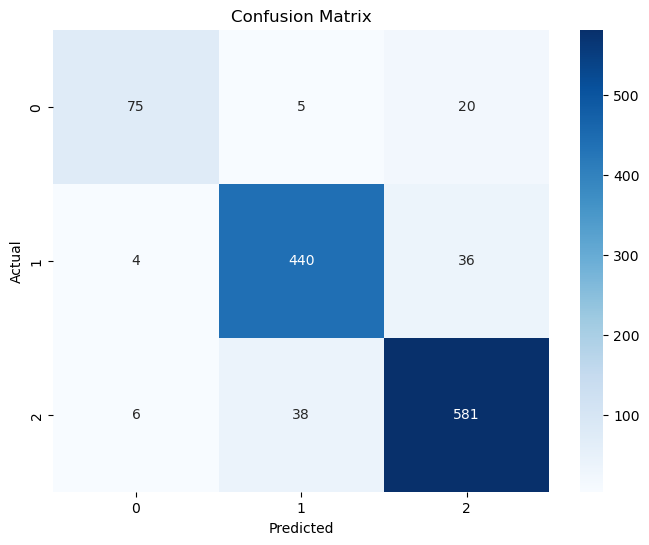

In [90]:
# X and y are our features and target variable
rf_rs_cv = RandomForestClassifier()  # Replace with our optimized model

# Get cross-validated predictions
predictions = cross_val_predict(rf_rs_cv, X, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Diagonal Values (True Positives): The diagonal values represent the number of points for which the predicted label is equal to the true label. While we are predicting the Adaptivity Level. The encoding was done in the following manners;
3rd Moderate Adaptivity Level = 2
2nd Low Adaptivity Level = 1 
1st High Adaptivity Level = 0

1. 75 instances of the High Adaptivity Level were correctly predicted as High Adaptivity Level.
2. 440 instances of the Low Adaptivity Level were correctly predicted as Low Adaptivity Level.
3. 581 instances of the Moderate Adaptivity Level were correctly predicted as Moderate Adaptivity Level. 

Off-Diagonal Values (False Positives and False Negatives):
1. For the High Adaptivity Level, 5 instances were wrongly predicted as Low Adaptivity Level and 20 as the Moderate Adaptivity Level.
2. For the Low Adaptivity Level, 4 instances were wrongly predicted as the High Adaptivity Level and 36 as the Moderate Adaptivity Level.
3. For the Moderate Adaptivity Level, 6 instances were wrongly predicted as the High Adaptivity Level and 38 as the Low Adaptivity Level.
Analysis:

The model is most accurate in predicting the Moderate Adaptivity Level, with 581 true positives and relatively fewer false positives and false negatives.
The model performs well in predicting the Low Adaptivity Level too, with 440 true positives. However, it has a higher number of false negatives (36) compared to the High Adaptivity Level.
The High Adaptivity Level has the least number of true positives (75), indicating that the model might be less effective in correctly identifying instances of High Adaptivity Level compared to the others.
Overall our model shows strong predictive ability, especially for the Low Adaptivity Level and Moderate Adaptivity Level. 
